# Customer Churn Exploratory Analysis

### Team members: Ellisha, Ikram, Brian

This project aims to predict customer churn in Telco company. The dataset contains 7043 observations and 31 variables and can be found on [Kaggle](https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset).

This workbook focuses on the exploratory analysis.

## Loading Libraries

In [1]:
## Dataset manipulation
import pandas as pd 
import numpy as np 

## Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

## Writing Functions

### Unique Values Function

In [2]:
def unique_values(df, variable):
    
    """
    Function to print unique values and their counts for a variable
    """
    
    print(f'The variable {variable} has {len(df[variable].unique())} unique values: \n')
    print(f'{df[variable].unique()}')
    print(f'-------------------------------------------------------------------------- \n')

### Missing Values Function

In [3]:
def missing(df):
    
    """
    Function to show the counts of missing values of each variable and their percentages out of the whole dataset
    """
    
    variables = df.columns
    missings = df.isnull().sum()
    percent = round(missings/df.shape[0], 3)
    
    result = pd.DataFrame(list(zip(variables, missings, percent)))
    result.columns = ['Variables', 'Count', 'Percentage']
    result = result.sort_values(by = 'Count', ascending = False)
    
    print(result)

### Data Cleaning Function

In [4]:
def data_clean(df):
    
    """
    Function to clean a dataframe
    """
    
    ## Fill missing values in Churn Reason
    df['Churn Reason'] = df['Churn Reason'].fillna('Current Customer')
    
    ## Replace blank strings to 0 in Total Charges: their Tenure Months are 0, suggesting that they are new customers
    ## Convert Total Charges to float
    df['Total Charges'] = np.where(df['Total Charges'] == " ", 0, df['Total Charges'])
    df['Total Charges'] = df['Total Charges'].astype('float64')
    
    return df

### Eda Function

In [5]:
def kde_plot(df, feature):
    plt.figure(figsize = (10, 8))
    plt.title(f'KDE Plot of {feature}')
    ax0 = sns.kdeplot(df[df['Churn Label'] == 'No'][feature], color = 'navy', legend = True, label = 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn Label'] == 'Yes'][feature], color = 'orange', legend = True, label = 'Churn: Yes')
    plt.legend()
    plt.show()

## Reading in Data

In [6]:
churn_full = pd.read_excel('OneDrive\Desktop\Digital_Futures\Digital_Futures_Group_Project_3\customer_churn.xlsx')

## Inspecting Data

In [7]:
churn_full.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [8]:
print(f'Number of observations: {churn_full.shape[0]}')
print(f'Number of variables: {churn_full.shape[1]}')

Number of observations: 7043
Number of variables: 31


#### Inspecting Data Type of Each Variable

In [9]:
churn_full.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

- Total Charges might be incorrectly coded as an Object 

#### Inspecting Unique Values of Each Categorical Variable

In [10]:
for i in ['Country', 'State']:
    unique_values(churn_full, i)

The variable Country has 1 unique values: 

['United States']
-------------------------------------------------------------------------- 

The variable State has 1 unique values: 

['California']
-------------------------------------------------------------------------- 



- The dataset only contains data from California (U.S.)

#### Inspecting Missing Values in the Dataset

In [11]:
missing(churn_full)

            Variables  Count  Percentage
30       Churn Reason   5174       0.735
16   Internet Service      0       0.000
29        Churn Value      0       0.000
28        Churn Label      0       0.000
27      Total Charges      0       0.000
26    Monthly Charges      0       0.000
25     Payment Method      0       0.000
24  Paperless Billing      0       0.000
23           Contract      0       0.000
22   Streaming Movies      0       0.000
21       Streaming TV      0       0.000
20       Tech Support      0       0.000
19  Device Protection      0       0.000
18      Online Backup      0       0.000
17    Online Security      0       0.000
0          CustomerID      0       0.000
1               Count      0       0.000
14      Phone Service      0       0.000
13      Tenure Months      0       0.000
12         Dependents      0       0.000
11            Partner      0       0.000
10     Senior Citizen      0       0.000
9              Gender      0       0.000
8           Long

- There are a lot of missing values in Churn Reason (73.5% of the whole dataset)

In [12]:
churn_full[churn_full['Churn Reason'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN


- Seems like the first 1868 observations are all customers who churned and the ones after are the ones who stayed and thus do not have a value for Churn Reason. So we can group the missing values in Churn Reason into one group.

In [13]:
churn_full.Count.value_counts()

1    7043
Name: Count, dtype: int64

- The Count variable only has value of 1, so it is not useful

#### Inspecting Blank Strings in Total charges

In [14]:
churn_full[churn_full['Total Charges'] == " "][['Tenure Months', 'Contract', 'Monthly Charges', 'Total Charges', 'Churn Label']]

,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Label
2234,0,Two year,52.55,,No
2438,0,Two year,20.25,,No
2568,0,Two year,80.85,,No
2667,0,Two year,25.75,,No
2856,0,Two year,56.05,,No
4331,0,Two year,19.85,,No
4687,0,Two year,25.35,,No
5104,0,Two year,20.00,,No
5719,0,One year,19.70,,No
6772,0,Two year,73.35,,No


- 11 rows have Total Charges as a blank string
- Those customers have Tenure Months of 0 and Churn Label of 'No' , suggesting that they are new customers
- We might replace their Total Charges by 0

## Data Cleaning

In [15]:
churn_full_cleaned = data_clean(churn_full)

In [16]:
unique_values(churn_full_cleaned, 'Churn Reason')

The variable Churn Reason has 21 unique values: 

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' 'Current Customer']
-------------------------------------------------------------------------- 



In [17]:
churn_full_cleaned['Total Charges'].dtypes

dtype('float64')

In [18]:
for i in churn_full_cleaned.select_dtypes(include = 'object').columns:
    unique_values(churn_full, i)

The variable CustomerID has 7043 unique values: 

['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
-------------------------------------------------------------------------- 

The variable Country has 1 unique values: 

['United States']
-------------------------------------------------------------------------- 

The variable State has 1 unique values: 

['California']
-------------------------------------------------------------------------- 

The variable City has 1129 unique values: 

['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
-------------------------------------------------------------------------- 

The variable Lat Long has 1652 unique values: 

['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
-------------------------------------------------------------------------- 

The variable Gende

## EDA

In [19]:
churn_full_cleaned.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [20]:
churn_full_cleaned[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']].describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [21]:
churn_full_cleaned['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

#### We can see that there is a label imbalance in our response variable (around 3:1), so we might consider using oversampling or undersampling or both

### Gender

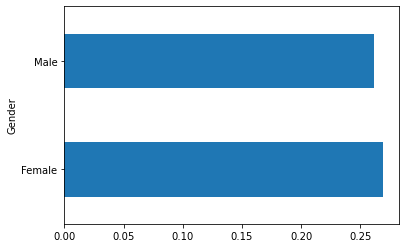

In [23]:
churn_full_cleaned.groupby('Gender')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

- No big difference between male and female, so gender might not be a good predictor

### Senior Citizen

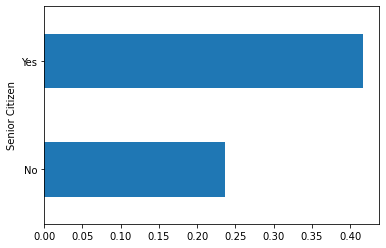

In [55]:
churn_full_cleaned.groupby('Senior Citizen')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

In [95]:
churn_full_cleaned.groupby('Senior Citizen')['Monthly Charges'].mean()

Senior Citizen
No     61.847441
Yes    79.820359
Name: Monthly Charges, dtype: float64

- Seniors are paying around 18 dollars more on average than non-seniors

In [94]:
churn_full_cleaned.groupby(['Senior Citizen', 'Churn Label']).agg({'Monthly Charges': ['mean'], 'Tenure Months': ['mean'], 'Total Charges': ['mean']}).reset_index()

,Senior Citizen,Churn Label,Monthly Charges,Tenure Months,Total Charges
,,,mean,mean,mean
0,No,No,58.618123,36.906610,2410.402773
1,No,Yes,72.298098,16.935391,1421.767229
2,Yes,No,79.182057,42.060060,3494.213363
3,Yes,Yes,80.713445,21.033613,1853.792332


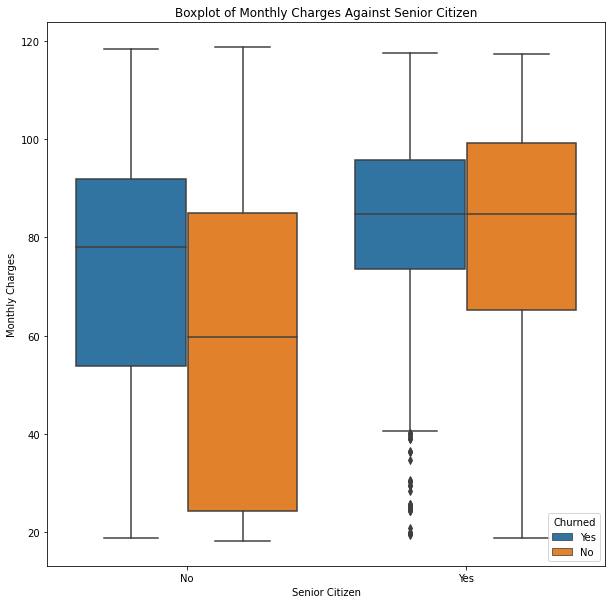

In [90]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'Senior Citizen',
            y = 'Monthly Charges',
            hue = 'Churn Label',
            data = churn_full_cleaned)
plt.legend(loc = 'lower right', title = 'Churned')
plt.title('Boxplot of Monthly Charges Against Senior Citizen')
plt.show()

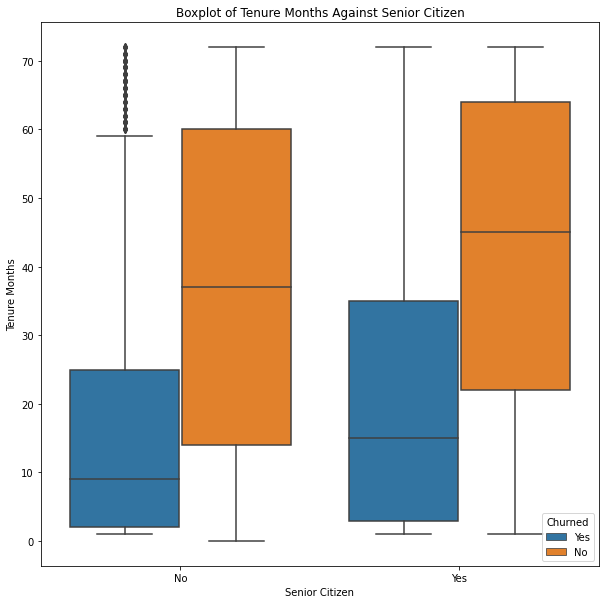

In [99]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'Senior Citizen',
            y = 'Tenure Months',
            hue = 'Churn Label',
            data = churn_full_cleaned)
plt.legend(loc = 'lower right', title = 'Churned')
plt.title('Boxplot of Tenure Months Against Senior Citizen')
plt.show()

- Senior customers are more likely to churn
- They also pay slightly more on average compared to non-senior churners

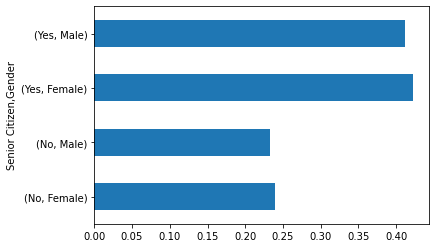

In [67]:
churn_full_cleaned.groupby(['Senior Citizen', 'Gender'])['Churn Value'].mean().plot(kind = 'barh')
plt.show()

- Again, gender does not make a difference

### Partner

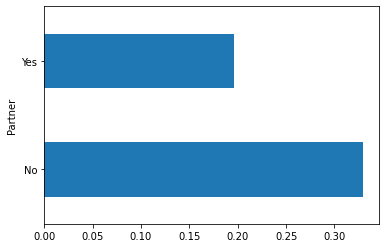

In [25]:
churn_full_cleaned.groupby('Partner')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

In [98]:
churn_full_cleaned.groupby(['Partner', 'Churn Label']).agg({'Monthly Charges': ['mean'], 'Tenure Months': ['mean'], 'CustomerID': ['count']})

Monthly Charges Tenure Months CustomerID
                               mean          mean      count
Partner Churn Label                                         
No      No                57.271856     28.362966       2441
        Yes               71.450958     13.176667       1200
Yes     No                64.831742     45.793267       2733
        Yes               79.805232     26.593423        669

### Dependents

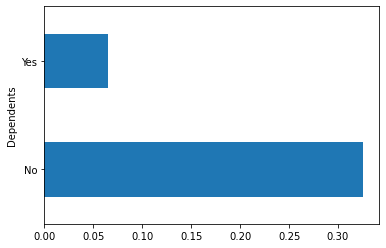

In [26]:
churn_full_cleaned.groupby('Dependents')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Phone Service

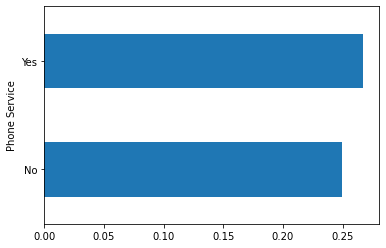

In [27]:
churn_full_cleaned.groupby('Phone Service')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Multiple Lines

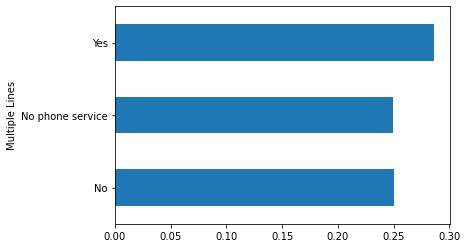

In [28]:
churn_full_cleaned.groupby('Multiple Lines')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Internet Service

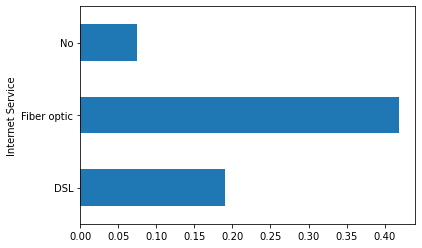

In [29]:
churn_full_cleaned.groupby('Internet Service')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

In [30]:
churn_full_cleaned.groupby('Internet Service')['CustomerID'].count()

Internet Service
DSL            2421
Fiber optic    3096
No             1526
Name: CustomerID, dtype: int64

### Online Security

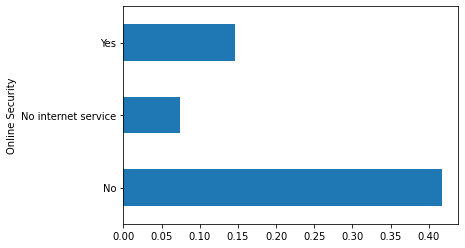

In [31]:
churn_full_cleaned.groupby('Online Security')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

In [32]:
churn_full_cleaned.groupby('Online Security')['CustomerID'].count()

Online Security
No                     3498
No internet service    1526
Yes                    2019
Name: CustomerID, dtype: int64

### Online Backup

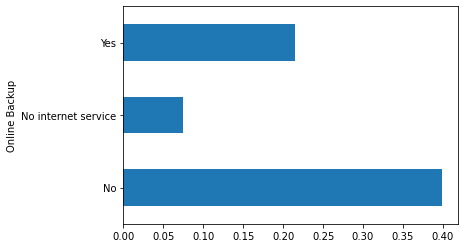

In [33]:
churn_full_cleaned.groupby('Online Backup')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

In [34]:
churn_full_cleaned.groupby('Online Backup')['CustomerID'].count()

Online Backup
No                     3088
No internet service    1526
Yes                    2429
Name: CustomerID, dtype: int64

### Device Protection

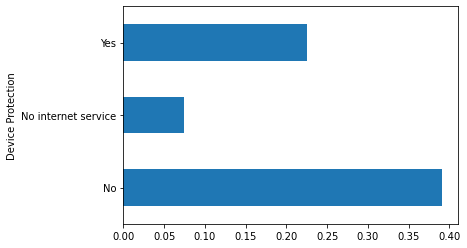

In [35]:
churn_full_cleaned.groupby('Device Protection')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Tech Support

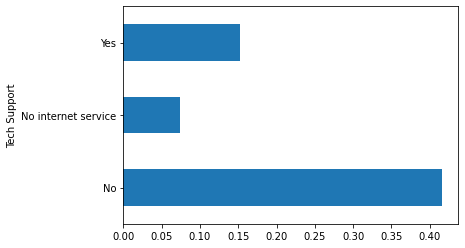

In [36]:
churn_full_cleaned.groupby('Tech Support')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Streaming TV

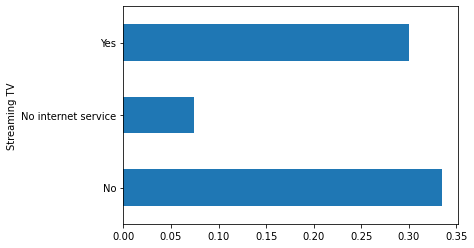

In [37]:
churn_full_cleaned.groupby('Streaming TV')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Streaming Movies

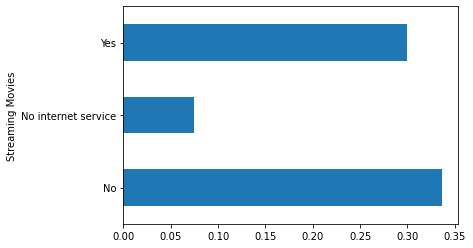

In [38]:
churn_full_cleaned.groupby('Streaming Movies')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Contract

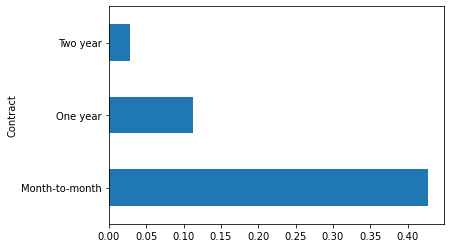

In [39]:
churn_full_cleaned.groupby('Contract')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Paperless Billing

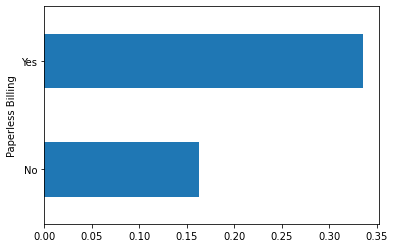

In [100]:
churn_full_cleaned.groupby('Paperless Billing')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Payment Method

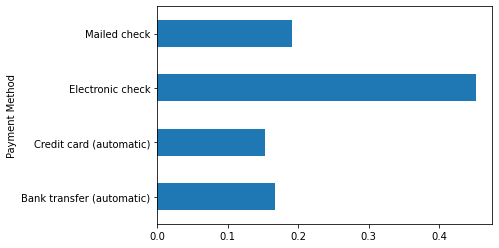

In [41]:
churn_full_cleaned.groupby('Payment Method')['Churn Value'].mean().plot(kind = 'barh')
plt.show()

### Monthly Charges

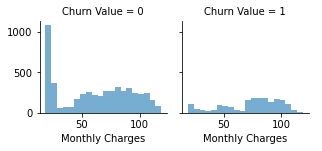

In [43]:
g = sns.FacetGrid(churn_full_cleaned, col = 'Churn Value', height = 2.2)
g.map(plt.hist, 'Monthly Charges', alpha = 0.6, bins = 20)
g.add_legend()
plt.show()

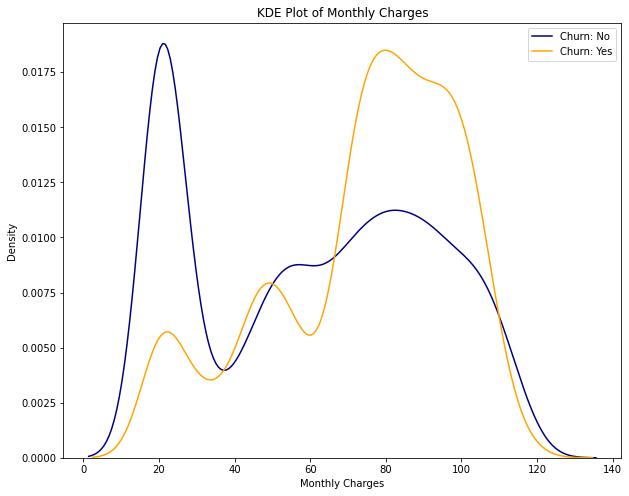

In [49]:
kde_plot(churn_full_cleaned, 'Monthly Charges')

### Total Charges

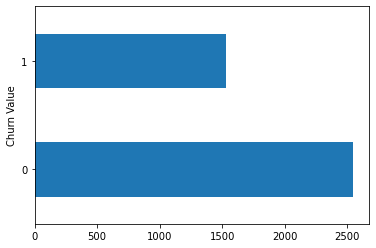

In [44]:
churn_full_cleaned.groupby('Churn Value')['Total Charges'].mean().plot(kind = 'barh')
plt.show()

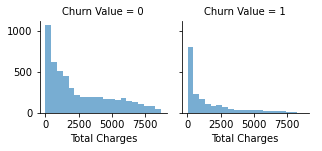

In [45]:
g = sns.FacetGrid(churn_full_cleaned, col = 'Churn Value', height = 2.2)
g.map(plt.hist, 'Total Charges', alpha = 0.6, bins = 20)
g.add_legend()
plt.show()

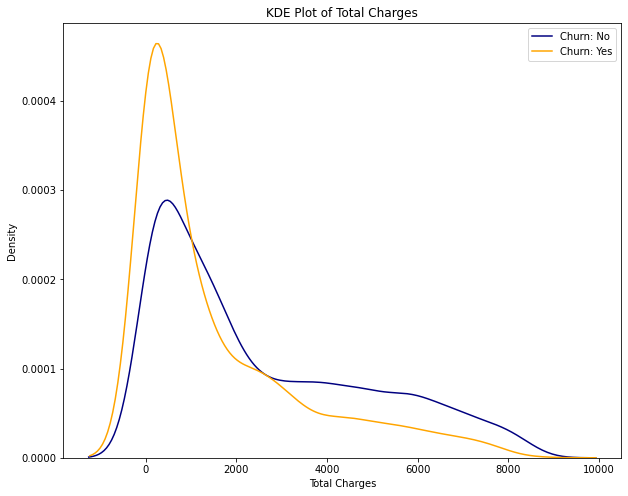

In [51]:
kde_plot(churn_full_cleaned, 'Total Charges')

### Tenure Months

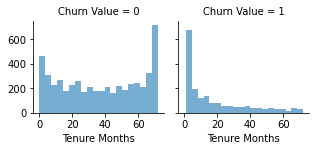

In [46]:
g = sns.FacetGrid(churn_full_cleaned, col = 'Churn Value', height = 2.2)
g.map(plt.hist, 'Tenure Months', alpha = 0.6, bins = 20)
g.add_legend()
plt.show()

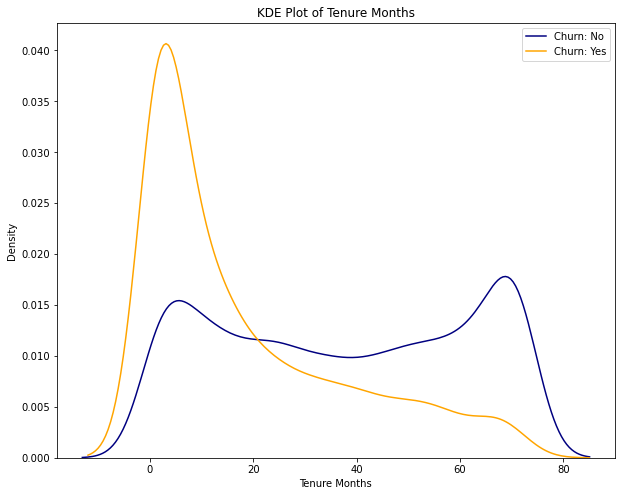

In [47]:
kde_plot(churn_full_cleaned, 'Tenure Months')